# Walmart Sales Prediction - Final Project
### -Pooja Bhadra 

### Introduction

Walmart is one of America's largest retailers. Due to its high consumer traffic, the stores are encountering stockouts and inventory shortages. This issue is affecting their revenue and reputation. 

In this project, I attempt to address the problem by creating a Machine Learning Algorithm that predicts weekly sales at several Walmart stores. The algorithm uses historical sales information to identify trends and forecast sales. This ML model will assist the retail brand to make informed decisions for inventory management.




### Objective 

- Understand and clean the Dataset.
- Build Regression Models to predict Walmart's weekly sales with respect to multiple features.
- Evaluate the models & compare their respective R2 and RMSE scores.

### About the Data 

The data for this porject has been obtained from Kaggle. It pertains to weekly sales of 45 Walmart stores over a timeframe of 3 years (2010-2012).  

Following are the columns included in dataset:
- Store - Store number
- Date -  Date of sales
- Weekly Sales - Sales for a given week for a given store
- Holiday Flag - Whether the week is a special holiday week 1 – Holiday week and 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel Price - Cost of fuel in the region
- CPI – Prevailing Consumer Price Index
- Unemployment - Prevailing Unemployment Rate

Here our dependent variable or the column which we are trying to predict is Weekly sales and rest are independent variables.

### Let's start building the algorithm

### Importing Libraries

In [342]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [343]:
walmart_df = pd.read_csv('Walmart.csv')
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


### Exploratory Data Analysis

In [344]:
# Knowing the Dimensions of the data

row_count, col_count = walmart_df.shape
print("rows:" , row_count, " columns:", col_count)

rows: 6435  columns: 8


In [345]:
# Descriptive Statistics

walmart_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [346]:
# Splitting 'Date' column to Day of the Week, Month and Year

walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])
walmart_df['Day'] = walmart_df['Date'].dt.weekday
walmart_df['Month'] = walmart_df['Date'].dt.month
walmart_df['Year']  = walmart_df['Date'].dt.year
walmart_df.drop('Date',axis=1,inplace=True)
walmart_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [347]:
# Creating new dataframe and renaming attributes of the columns.

df1 = walmart_df.copy()

days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df1['Day'] = df1['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}
df1['Month']= df1['Month'].map(months)

df1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


### Data Visualization

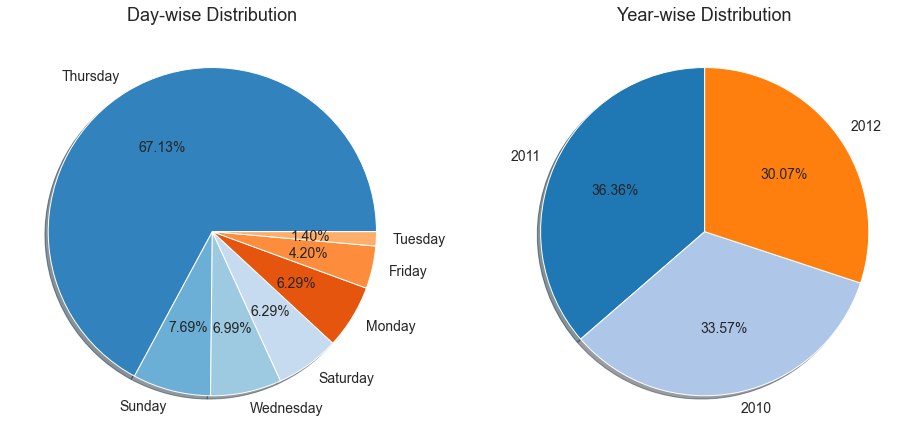

In [348]:
# Creating Pie Charts to show the share of weekly sales.

# Day-wise share of Sales
plt.figure(figsize=(25,20))
plt.subplot(1, 3, 2)
plt.pie(df1['Day'].value_counts().values, labels =df1['Day'].value_counts().index,
autopct = '%1.2f%%', shadow=True,colors=sns.color_palette('tab20c'), textprops={'fontsize':14}) 
plt.title('Day-wise Distribution', fontsize = 18)
plt.grid()

# Year-wise share of Sales
plt.subplot(1, 3, 3)
plt.pie(df1['Year'].value_counts().values, labels =df1['Year'].value_counts().index,
autopct = '%1.2f%%',startangle=90, shadow=True,colors=sns.color_palette('tab20'),labeldistance=1.1, textprops={'fontsize':14})  
plt.title('Year-wise Distribution', fontsize = 18)
plt.grid()
plt.show()

##### Interpretation

From the above Pie-charts, we can see that the highest number of sales took place on Thursdays in Walmart. Thus, stores need to manage their inventories in order to meet large demand on this day of the week. On the other hand, we can observe that the year does not have much impact on sales made by these stores.

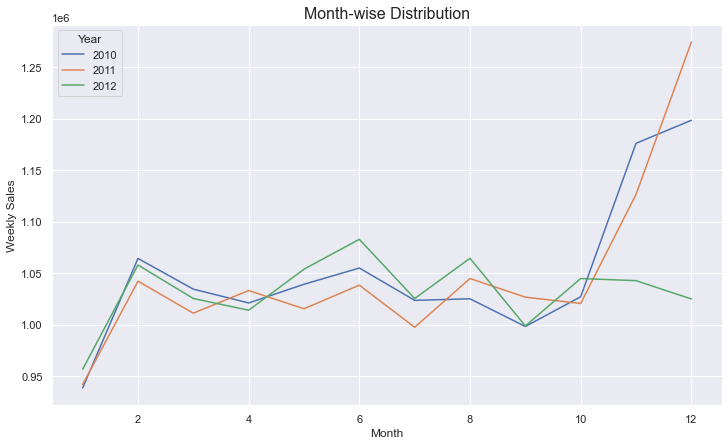

In [349]:
# Understanding trend of Sales made in each month

plt.rcParams['figure.figsize'] = 12,7
monthly_sales = pd.pivot_table(walmart_df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()
plt.ylabel('Weekly Sales')
plt.title('Month-wise Distribution', fontsize = 16 )
plt.show()

##### Interpretation

The above chart shows that there is a huge surge in store sales in the months of November and December. This is not contrary to our expectations. These two months are packed with holidays, deals and discounts. Thus, it is the busiest shopping period for the retailers often causing demand to exceed supply.

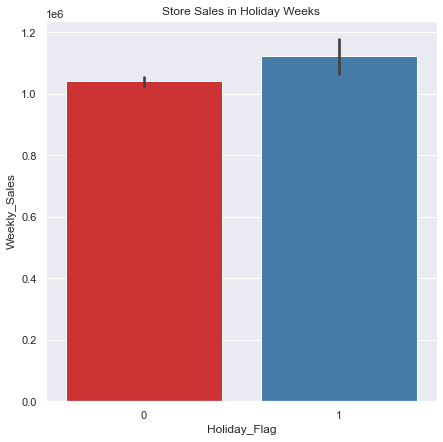

In [350]:
# Bar Chart to compare sales in a Normal Week versus Holiday Week

plt.figure(figsize=(7,7))
sns.set(font_scale=1)
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=walmart_df, palette = 'Set1')
plt.title('Store Sales in Holiday Weeks')
plt.show()

##### Interpretation

The bar chart reconciles with our previous findings. The sales are higher in a Holiday week compared to a Non-Holiday Week.

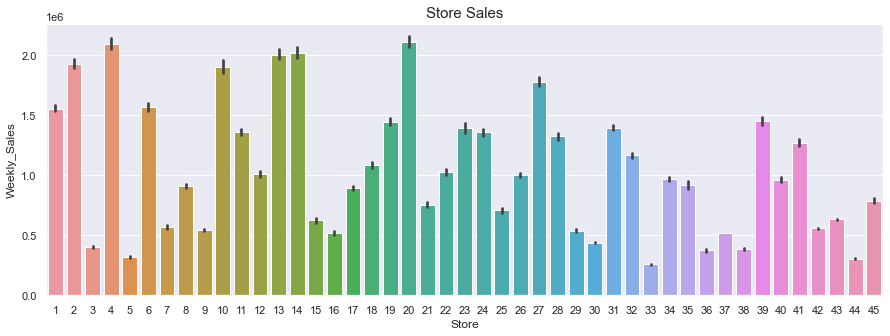

In [351]:
# Bar Chart to denote individual store sales

plt.figure(figsize=(15,5))
sns.barplot(x='Store' , y='Weekly_Sales', data=walmart_df)
plt.title('Store Sales', fontsize = 15)
plt.show()

##### Interpretation

We can see the from the above graph that weekly sales vary from store to store. Certain stores make higher sales compared to the others. This can be due to factors like location, population density of the area, per capita income and consumer propensity to purchase in that region.

### Data Wrangling

#### Missing Values

In [352]:
# Checking for Missing Values

walmart_df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

#### No Missing Values? Let's generate them!

The dataset is clean and free from any missing values. However, as a part of this project, I randomly generate missing values in the continuous variables and impute them.

In [353]:
# Generating 100 Missing Values

cell_count = 100                                                            #Number of values to be replaced by NaN
random_col_ind = np.random.randint(3,7, size=cell_count)                          #randomly generating column index
random_row_ind = np.random.randint(0,len(walmart_df)-1, size=cell_count)             #randomly generating row index

removed_values = {}

# Replacing elements randomly in our dataframe with NaN
for i in range (0, cell_count):
    removed_values[(random_row_ind[i], random_col_ind[i])] = walmart_df.iloc[random_row_ind[i], random_col_ind[i]]
    walmart_df.iat[random_row_ind[i], random_col_ind[i]] = np.nan

In [354]:
# Checking for Missing Values

percent_missing = walmart_df.isna().sum() * 100 / len(walmart_df)
missing_value_df = pd.DataFrame({'No. of Missing Values': walmart_df.isna().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,No. of Missing Values,percent_missing
Store,0,0.00000
Weekly_Sales,0,0.00000
Holiday_Flag,0,0.00000
Day,0,0.00000
Month,0,0.00000
Year,0,0.00000
Unemployment,23,0.35742
Fuel_Price,24,0.37296
Temperature,26,0.40404
CPI,27,0.41958


In [355]:
# Imputing Missing Values using K-Nearest Neighbors

Imputer = KNNImputer(n_neighbors=10)                               # Considering 10 nearest neighbours i.e. k = 10
imp_val = Imputer.fit_transform(walmart_df)
walmart_sales = pd.DataFrame(data=imp_val,index=walmart_df.index, columns= walmart_df.columns)

In [356]:
# Checking Missing Values

percent_missing = walmart_sales.isna().sum() * 100 / len(walmart_sales)
missing_value_df = pd.DataFrame({'No. of Missing Values': walmart_sales.isna().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,No. of Missing Values,percent_missing
Store,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Day,0,0.0
Month,0,0.0
Year,0,0.0


From the above table we can see that we have successfully imputed the Missing Values. 

Since we randomly generated missing values, let us check if they are close to the actual values in our dataset. 

In order to do so, we can compare them directly from our original data, or use a scatter plot and correlation matrix.

In [357]:
# Comparing the removed values with imputed values

comparison_data = []
indices = removed_values.keys()
for row, col in indices:
    entry = [removed_values[(row, col)], walmart_sales.iloc[row, col]]
    comparison_data.append(entry)
    
comparison_df = pd.DataFrame(comparison_data, columns=['Actual', 'Imputed'])
comparison_df.head()

,Actual,Imputed
0,7.716000,8.159000
1,3.162000,3.232600
2,3.917000,3.390600
3,194.509211,164.280269
4,62.790000,76.137000


<Figure size 1080x360 with 0 Axes>

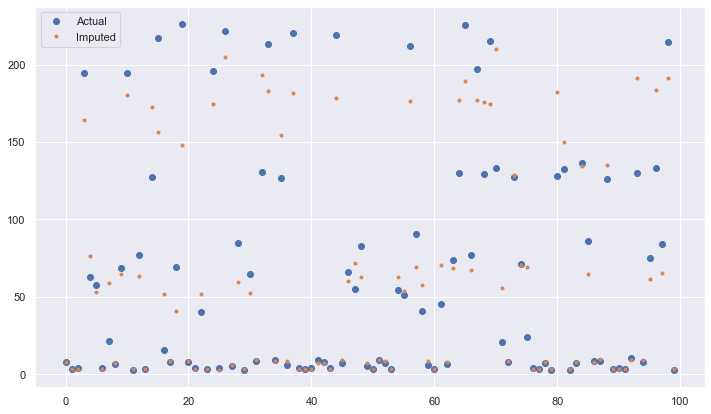

In [358]:
# Scatter plot to compare actual and imputed values

plt.figure(figsize=(15,5))
comparison_df.plot(style=['o','.'])
plt.show()

In [359]:
# Correlation matrix to know the correlation between actual and imputed values

comparison_df.corr()

,Actual,Imputed
Actual,1.000000,0.943825
Imputed,0.943825,1.000000


##### Inference

We can see from the above graph and correlation matrix that KNN does a good job in imputing missing values in dataset.

#### Duplicate Values



In [360]:
# Check for Duplicates

walmart_sales[walmart_sales.duplicated()]

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year


##### Inference

There are no duplicate values in the dataset.

### Feature Engineering

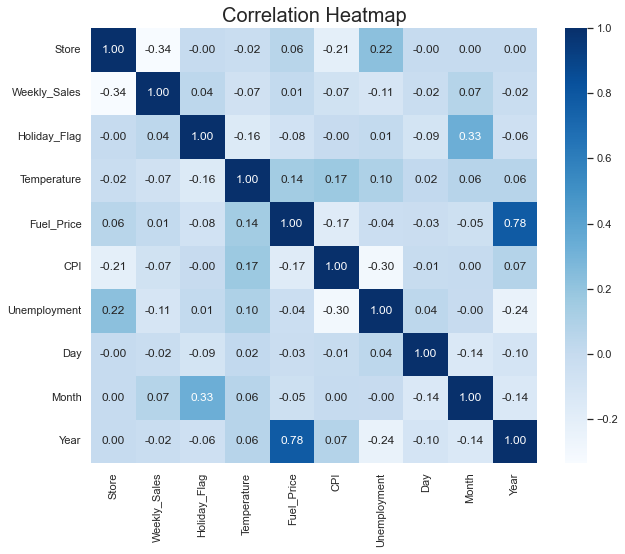

In [361]:
# Correlation between variables in our data

corr_data=walmart_sales.corr()

# Plotting Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.set(font_scale=1)
sns.heatmap(corr_data, annot=True,fmt='.2f', cmap="Blues")
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

##### Inference

Considering a threshold of 0.80, there is no high correlation between the variables in our data. The correlation between Fuel and Year is 0.78, however it is below the specified threshold.

#### Splitting Dataset into Train and Test 

In the following step, we define dependent (y) and independent variables (x). 

Since we do not have a separate dataset to test our model, we will use the train-test split procedure to estimate the performance of our algorithm. The proportion will be 80% (training) - 20% (testing) respectively.

In [362]:
# Train-Test Split

from sklearn.model_selection import train_test_split

train, test = train_test_split(walmart_sales, test_size=0.2)


# Defining Dependent and Independent Variables

x_train = train.drop(['Weekly_Sales'],axis=1)
y_train = train['Weekly_Sales']

x_test = test.drop(['Weekly_Sales'],axis=1)
y_test = test['Weekly_Sales']

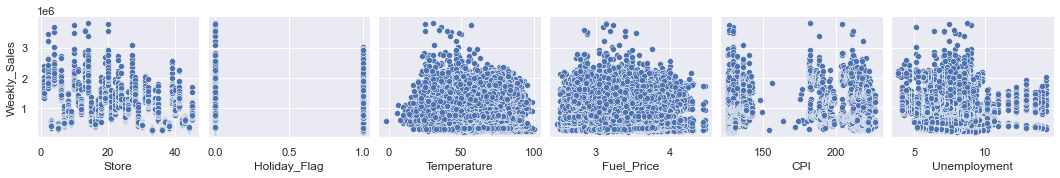

In [363]:
# Plotting pairwise relation between dependent and independent variables 

pp = sns.pairplot(data = walmart_sales,
                  y_vars = ['Weekly_Sales'],
                  x_vars = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'])

We cannot identify the correlation between weekly sales and explanatory variables from the above pair plots.

#### Skewness

In [364]:
# Skewness

x_train.skew(axis = 0, skipna = True)

Store          -0.004370
Holiday_Flag    3.356225
Temperature    -0.330600
Fuel_Price     -0.097418
CPI             0.061902
Unemployment    1.177361
Day            -1.233447
Month           0.007704
Year            0.068217
dtype: float64

We can see from the above table that except 'Unemployment', rest of our variables are symmetric. The skewness values of Holiday_Flag and Day can be ignored since they are categorical variables and not continuous. 

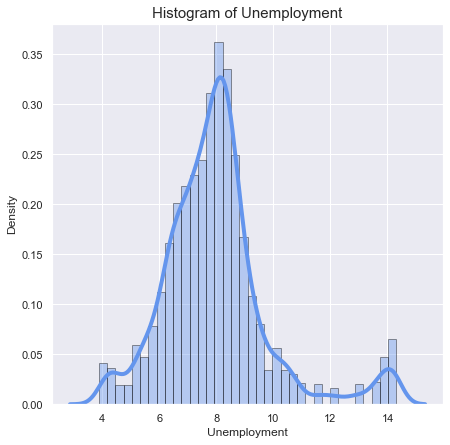

In [365]:
# Plotting Histogram to visualize skewness in 'Unemployment' variable.

plt.rcParams['figure.figsize'] = 7,7
sns.distplot(x_train['Unemployment'], hist=True, kde=True, 
             bins=int(180/5), color = 'cornflowerblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Histogram of Unemployment', fontsize = 15)
plt.show()

#### BoxCox Transformation

In [366]:
# BoxCox Transformation

from scipy.stats import boxcox

x_train['Unemployment'] = boxcox(x_train['Unemployment'])[0]

In [367]:
# Skewness after transformation

x_train.skew(axis = 0, skipna = True)

Store          -0.004370
Holiday_Flag    3.356225
Temperature    -0.330600
Fuel_Price     -0.097418
CPI             0.061902
Unemployment   -0.007176
Day            -1.233447
Month           0.007704
Year            0.068217
dtype: float64

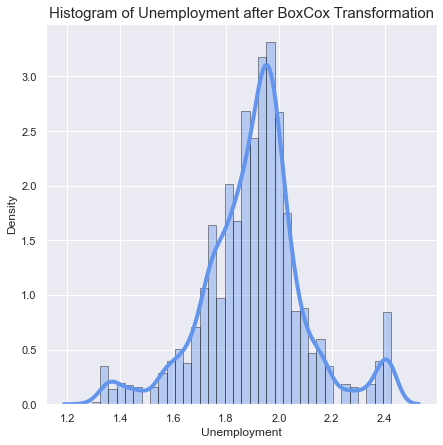

In [368]:
# Histogram of 'Unemployment' variable after BoxCox Transormation

plt.rcParams['figure.figsize'] = 7,7
sns.distplot(x_train['Unemployment'], hist=True, kde=True, 
             bins=int(180/5), color = 'cornflowerblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Histogram of Unemployment after BoxCox Transformation', fontsize = 15)
plt.show()

The data for 'Unemployment' is now symmetric after the BoxCox Transformation.

#### Scaling Independent Variables

The variables in our dataset have different units of measurement. Therefore, in order to make them comparable we scale them in the next step.

In [369]:
# Scaling dataset

from sklearn.preprocessing import scale

x_train = scale(x_train, with_mean = True, with_std = True)

#### Scaling and Transforming Test Data

Let us repeat the above steps for Test Data.

In [370]:
# Skewness check for Test data

x_test.skew(axis = 0, skipna = True)

Store           0.018347
Holiday_Flag    3.448669
Temperature    -0.357264
Fuel_Price     -0.084573
CPI             0.067809
Unemployment    1.209425
Day            -1.231181
Month           0.087541
Year            0.040403
dtype: float64

Except for 'Unemployment', all the other continuous variables are symmetric. We can disregard 'Holiday_Flag' and 'Day' columns as they are categorical variables.

In [371]:
# Applying BoxCox transformation to 'Unemployment'

x_test['Unemployment'] = boxcox(x_test['Unemployment'])[0]

In [372]:
# Skewness check after BoxCox Transformation

x_test.skew(axis = 0, skipna = True)

Store           0.018347
Holiday_Flag    3.448669
Temperature    -0.357264
Fuel_Price     -0.084573
CPI             0.067809
Unemployment   -0.016298
Day            -1.231181
Month           0.087541
Year            0.040403
dtype: float64

In [373]:
# Scaling Test data

x_test = scale(x_test, with_mean = True, with_std = True)

### Principal Component Analysis

In [374]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)

PCA()

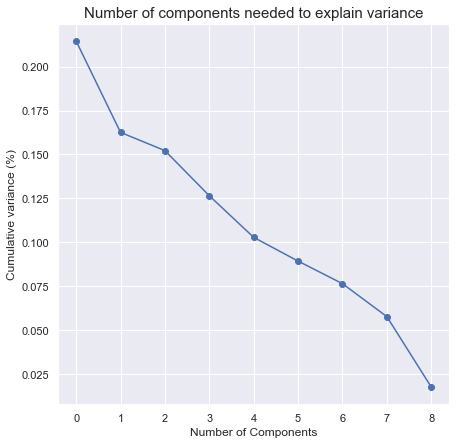

In [375]:
plt.plot(pca.explained_variance_ratio_, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('Number of components needed to explain variance', fontsize = 15)

plt.show()

##### Inference

Since our data has only 9 independent variables, Principal Component Analysis (a method which uses linear combination of predictors to capture variance) is futile. From the above graph, we can see that we need to consider all the variables to explain the variance in our dependent variable 'Weekly Sales'.

### Model Building and Evalualtion

In this section, we will fit different models to our dataset and evaluate their performances based on their respective R squared values and RMSE scores. 

#### Model 1 : Linear Regression 

In [376]:
# Fitting Linear Regression Model to our train dataset

lr = LinearRegression()
lr.fit(x_train,y_train.values)

LinearRegression()

In [377]:
# Model Crossvalidation

from sklearn.model_selection import cross_validate

scores_1 = cross_validate(lr, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_1['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_1['train_r2'])))

RMSE: 520083.01368565037
R2: 0.14766074554846811


In [378]:
# Using Linear Regression Model to predict on test data

from sklearn.metrics import r2_score, mean_squared_error

# Predicting dependent variable
y_hat_1 = lr.predict(x_test)

# Finding r2 and RSME
m1_test_r2 = r2_score(y_test, y_hat_1)
m1_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_1))

print('test RMSE: '+str(m1_test_rmse))
print('test r2: '+str(m1_test_r2))

test RMSE: 526945.9530346621
test r2: 0.1399810303277299


##### Inference

We can see from the above results that this model explains only around 14% variation in predicting demand. And, the RMSE for this model is very high. 

Let us try to fit other models and check their performance. 

#### Model 2 : Lasso Regression Model

In [379]:
# Fitting Lasso Regression Model to our train dataset

lasso_reg = Lasso()
lasso_reg.fit(x_train,y_train.values)

Lasso()

In [380]:
# Model Crossvalidation

scores_2 = cross_validate(lasso_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_2['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_2['train_r2'])))

RMSE: 520083.0137030841
R2: 0.1476607454913245


In [381]:
# Using Lasso Model to predict on test data

y_hat_2 = lasso_reg.predict(x_test)

# Finding r2 and RSME
m2_test_r2 = r2_score(y_test, y_hat_2)
m2_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_2))

print('test RMSE: '+str(m2_test_rmse))
print('test r2: '+str(m2_test_r2))

test RMSE: 526945.8694090373
test r2: 0.13998130329545055


##### Inference

This model performs similar to Linear Regression Model. It explains only 14% variation and has a very high RMSE value. 

Let's try to fit another model.

#### Model 3 : Ridge Regression Model

In [382]:
# Fitting Ridge Regression Model to our train dataset

ridge_reg = Ridge()
ridge_reg.fit(x_train,y_train.values)

Ridge()

In [383]:
# Model Crossvalidation

scores_3 = cross_validate(ridge_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_3['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_3['train_r2'])))

RMSE: 520083.01681080816
R2: 0.147660735305749


In [384]:
# Using Model to predict on test data

y_hat_3 = ridge_reg.predict(x_test)

# Finding r2 and RSME
m3_test_r2 = r2_score(y_test, y_hat_3)
m3_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_3))

print('test RMSE: '+str(m3_test_rmse))
print('test r2: '+str(m3_test_r2))

test RMSE: 526945.5753012307
test r2: 0.13998226331110553


##### Inference

This model does no better than Linear and Lasso Regression. Just like the previous two models, it's r_square is only 14% and RMSE value is very high.

Therefore, in the next part, let us fit ElasticNet Regressor.

#### Model 4 :  ElasticNet Regression Model

In [385]:
# Fitting ElasticNet Regression Model to our train dataset

elastic_net_reg = ElasticNet()
elastic_net_reg.fit(x_train,y_train.values)

ElasticNet()

In [386]:
# Model Crossvalidation

scores_4 = cross_validate(elastic_net_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_4['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_4['train_r2'])))

RMSE: 525835.2624440779
R2: 0.12870370885099217


In [387]:
# Using Model to predict on test data

y_hat_4 = elastic_net_reg.predict(x_test)

m4_test_r2 = r2_score(y_test, y_hat_4)
m4_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_4))

print('test RMSE: '+str(m4_test_rmse))
print('test r2: '+str(m4_test_r2))

test RMSE: 532207.8954922887
test r2: 0.12271943118902628


##### Inference

From the above results we can see that ElasticNet Regression explains the least r_squared value(only around 12%) and highest RMSE compared to the previous models. 

#### Model 5 :  K- Nearest Neighbors Regression Model 

In [388]:
# Fitting K- Nearest Neighbors Regression Model to our train dataset

knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train,y_train.values)

KNeighborsRegressor()

In [389]:
# Model Crossvalidation

scores_5 = cross_validate(knn_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_5['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_5['train_r2'])))

RMSE: 361257.59156153374
R2: 0.5887492872025614


In [390]:
# Using Model to predict on test data

y_hat_5 = knn_reg.predict(x_test)

m5_test_r2 = r2_score(y_test, y_hat_5)
m5_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_5))

print('test RMSE: '+str(m5_test_rmse))
print('test r2: '+str(m5_test_r2))

test RMSE: 461615.55035311193
test r2: 0.3400109281011835


##### Inference

The KNN Regression Model performs better than the previous models. It explains around 58% variation on training dataset. However, when applied to test data, its performance dropped significantly to 34%. 

#### Model 6 :  Decision Tree Regression Model

In [391]:
# Fitting Decision Tree Regression Model to our train dataset

decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(x_train,y_train.values)

DecisionTreeRegressor()

In [392]:
# Model Crossvalidation

scores_6 = cross_validate(decision_tree_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_6['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_6['train_r2'])))

RMSE: -0.0
R2: 1.0


In [393]:
# Using Model to predict on test data

y_hat_6 = decision_tree_reg.predict(x_test)

m6_test_r2 = r2_score(y_test, y_hat_6)
m6_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_6))

print('test RMSE: '+str(m6_test_rmse))
print('test r2: '+str(m6_test_r2))

test RMSE: 232147.8082749154
test r2: 0.8330812747352722


##### Inference

Decision Tree Regression Model explains around 83% variation in the model. This is much higher than our previous models. Also, the RMSE is low for the model. 

In the next step, let's check the feature importance for this model.

##### Feature Importance

In [394]:
# Setting Criteria for feature importance

from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(decision_tree_reg, x_train, y_train, n_repeats=500, scoring='r2')

In [395]:
# Stating all the features considered
feature_names = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year']

# Calculating average across various runs
# Creating a New DataFrame of these averages

walmart_var_imp = pd.DataFrame({'feature_name': feature_names, 'importance': perm_imp['importances_mean']})
walmart_var_imp['importance'] = walmart_var_imp['importance']/walmart_var_imp['importance'].sum()
walmart_var_imp

,feature_name,importance
0,Store,0.534658
1,Holiday_Flag,0.008362
2,Temperature,0.029918
3,Fuel_Price,0.017331
4,CPI,0.325094
5,Unemployment,0.039370
6,Day,0.007165
7,Month,0.022723
8,Year,0.015381


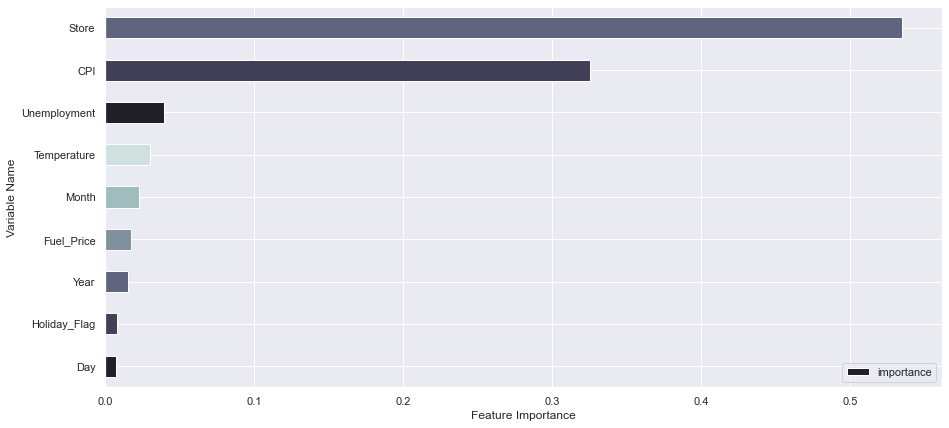

In [396]:
# Ploting a bar chart to visualize feature importance

walmart_var_imp.sort_values('importance').plot.barh('feature_name', 'importance', color =sns.color_palette('bone'), figsize = (15,7))
plt.xlabel('Feature Importance')
plt.ylabel('Variable Name')
plt.show()

##### Inference

The Store is the most important factor in predicting sales. The next important features are CPI and Unemployment rates in the country. The remaining features have less than 5% importance in estimating Walmart's sales. 

##### Let us fit Random Forest Regression Model and see if it performs better than Decision Tree Regression.

#### Model 7 :  Random Forest Regression Model

In [397]:
# Fitting Random Forest Regression Model to our train dataset

randomforest_reg = RandomForestRegressor()
randomforest_reg.fit(x_train,y_train.values)

RandomForestRegressor()

In [398]:
# Model Crossvalidation

scores_7 = cross_validate(randomforest_reg, x_train, y_train.values, cv=10, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)

print("RMSE: "+str(np.sqrt(-1*np.mean(scores_7['train_neg_mean_squared_error']))))
print('R2: '+str(np.mean(scores_7['train_r2'])))

RMSE: 54532.72674463654
R2: 0.9906296198511783


In [399]:
# Using Model to predict on test data

y_hat_7 = randomforest_reg.predict(x_test)

m7_test_r2 = r2_score(y_test, y_hat_7)
m7_test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_7))

print('test RMSE: '+str(m7_test_rmse))
print('test r2: '+str(m7_test_r2))

test RMSE: 161148.87615329507
test r2: 0.919567707732774


##### Inference

Random Forest Regression outperforms all our models with the highest R_squared value of 92% and lowest RMSE score. 

Let us plot and visualize the performance of this model.

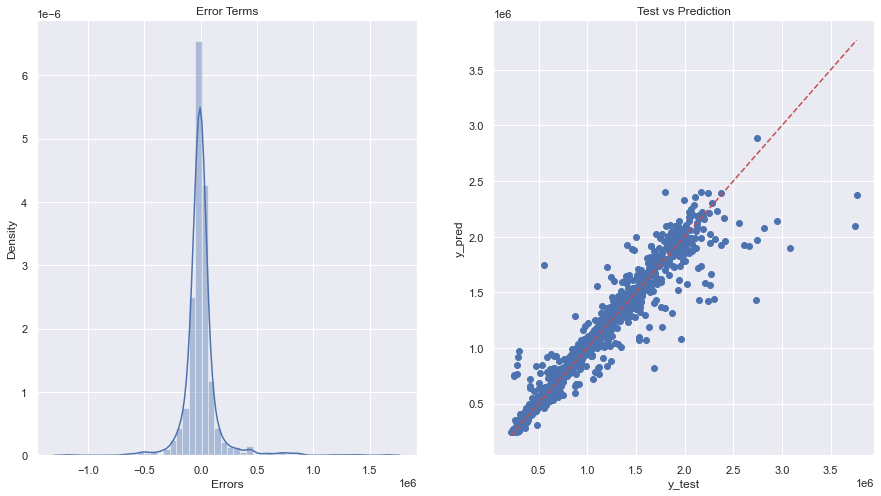

In [400]:
# Visualizing RandomForest Regression Model's Performance

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.distplot((y_test - y_hat_7))
plt.title('Error Terms', fontsize = 12)          
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(y_test, y_hat_7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r--')
plt.title('Test vs Prediction', fontsize = 12)         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()

##### Inference

We can clearly see from the above plots that RandomForest Regression Model fits best to our data. It is able to predict our dependent variable 'Weekly Sales' with high accuracy. Besides, we can also observe that our error terms are standard normally distributed. 

Next, let us check Feature Importance for this model.

In [401]:
# Setting Criteria for feature importance

perm_imp_1 = permutation_importance(randomforest_reg, x_train, y_train, n_repeats=500, scoring='r2')

In [402]:
# Calculating average across various runs
# Creating a New DataFrame of these averages

walmart_var_imp_1 = pd.DataFrame({'feature_name': feature_names, 'importance': perm_imp_1['importances_mean']})
walmart_var_imp_1['importance'] = walmart_var_imp_1['importance']/walmart_var_imp_1['importance'].sum()
walmart_var_imp_1

,feature_name,importance
0,Store,0.615990
1,Holiday_Flag,0.003010
2,Temperature,0.014254
3,Fuel_Price,0.005932
4,CPI,0.306720
5,Unemployment,0.035698
6,Day,0.002699
7,Month,0.014700
8,Year,0.000997


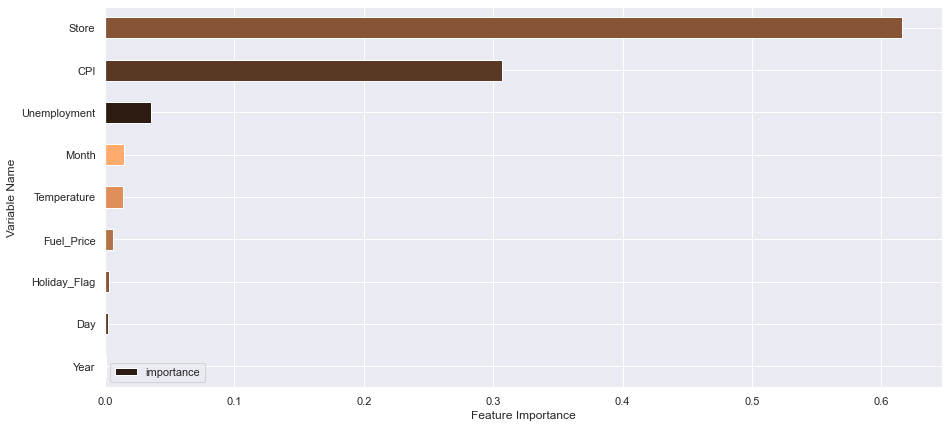

In [403]:
# Ploting a bar chart to visualize feature importance

walmart_var_imp_1.sort_values('importance').plot.barh('feature_name', 'importance', color =sns.color_palette('copper'), figsize = (15,7))
plt.xlabel('Feature Importance')
plt.ylabel('Variable Name')
plt.show()

##### Inference

The Store and CPI are the most important factors in predicting sales. The remaining features have less than 10% importance in estimating Walmart's sales. 

### Conclusion

##### Summary of Model Performances using Bar Chart.

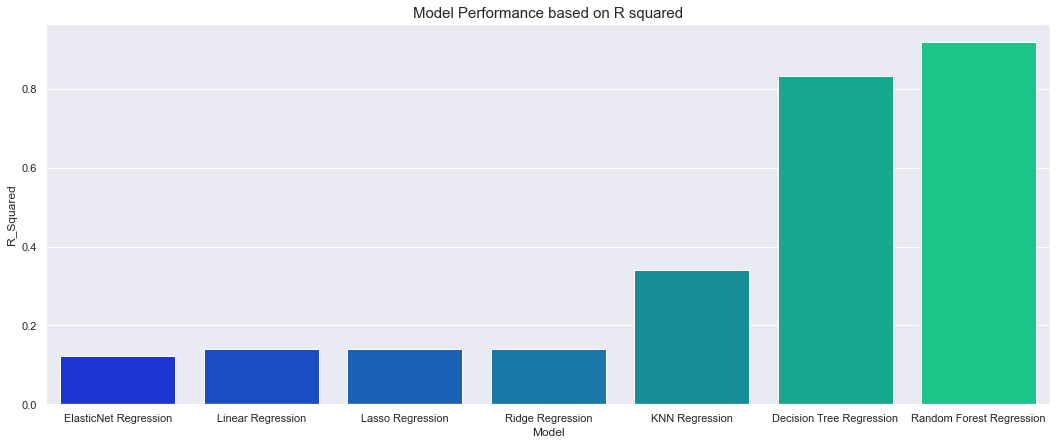

In [404]:
# Summarizing the performance of all the models based on their R-squared values.

# Creating a new DataFrame including Model and it's respective R2 and RMSE scores.
model_name_list = ["Linear Regression", "Lasso Regression", "Ridge Regression", "ElasticNet Regression", "KNN Regression", "Decision Tree Regression", "Random Forest Regression"]
r2_list = [m1_test_r2, m2_test_r2, m3_test_r2, m4_test_r2, m5_test_r2, m6_test_r2, m7_test_r2]
rmse_list = [m1_test_rmse, m2_test_rmse, m3_test_rmse, m4_test_rmse, m5_test_rmse, m6_test_rmse, m7_test_rmse]

model_perf_df = pd.DataFrame({'Model': model_name_list, 'R_Squared': r2_list, 'RMSE': rmse_list })

plt.figure(figsize=(18,7))
sns.barplot(x='Model' , y='R_Squared', data=model_perf_df, palette = 'winter', order=model_perf_df.sort_values('R_Squared').Model)
plt.title('Model Performance based on R squared', fontsize = 15)
plt.show()

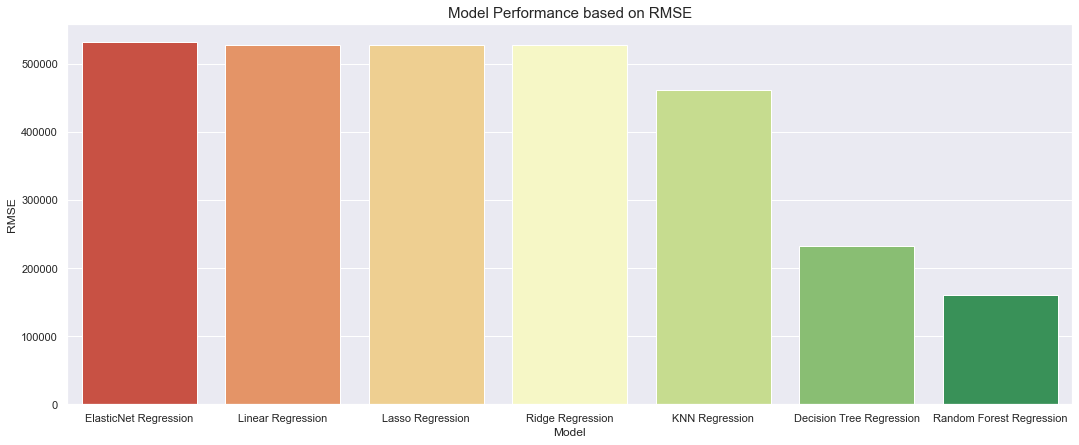

In [405]:
plt.figure(figsize=(18,7))
sns.barplot(x='Model' , y='RMSE', data=model_perf_df, palette = 'RdYlGn', order=model_perf_df.sort_values('R_Squared').Model)
plt.title('Model Performance based on RMSE', fontsize = 15)
plt.show()

Overall, we can clearly see from the above charts that ElasticNet performs the worst and RandomForest Regression Model performs the best for the given dataset. Our analysis shows that RandomForest Regression Model has the highest R-squared value and lowest RMSE in forecasting weekly sales of Walmart Stores. These findings have important implications for the business. Using this Machine Learning Model, Walmart stores can identify the factors that drive their sales and predict the future demand. Accordingly, the business can take decisions regarding inventory, staffing, and marketing strategies.  